<a href="https://colab.research.google.com/github/Faisal-javed-khan/NLP-PROJECT/blob/main/nlp_basic_advance_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>text preprocessing

lowercase\\remove html tag \\ removing urls\\ punctuation\\ chat word treatment\\speeling mistake \\ stopwords\\ imoji\\ tokenization\\ lem//stem

In [ ]:
document="""he Text Tag Group is a group of tags that are used to create well-formatted text documents. Text tags include <h1>-<h6>, <p>, <br>, <span>, <b>, <sup>, and others."""

In [ ]:
import pandas as pd
import re



df=pd.read_csv("/content/IMDB Dataset.csv")

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
df["review"]=df["review"].str.lower()

In [ ]:
df["review"]

we  create a function to remove html tags

In [ ]:
def remove_html_tag(text):
  p=re.compile("<.*?>")
  return p.sub(r"" , text )

In [ ]:
remove_html_tag(document)

applly here on ur dataset\

In [ ]:
df["review"]=df["review"].apply(remove_html_tag)

In [ ]:
df["review"].head(10)

<h1><b>handling shorthand sms text

In [ ]:
import pandas as pd

# Replace 'your_file.txt' with the actual file path
file_path = '/content/slang.txt'

# Read the text file line by line and store it in a list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Create a DataFrame with a single column 'text' containing the lines
# df = pd.DataFrame({'text': lines})
lines


In [ ]:
# Create an empty dictionary to store the key-value pairs
dict_shortlist = {}

# Iterate through the lines and split each line at '='
for line in lines:
    parts = line.strip().split('=')
    if len(parts) == 2:
        key, value = parts
        dict_shortlist[key] = value

# Print the dictionary
for key, value in dict_shortlist.items():
    print(f"{key}: {value}")

In [ ]:
dict_shortlist.keys()

In [ ]:
def chat_con(text):
  new_text=[]
  for w in text.split():
    if w.upper() in dict_shortlist:
      new_text.append(dict_shortlist[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [ ]:
chat_con("atk")
chat_con("gn")

<h1><b> remove punctuation

In [ ]:
doc="""Examples of different punctuation marks include: full stops (.),
    commas (,), question marks (?), exclamation marks (!), colons (:),
    semi-colons (;), apostrophes (') and speech marks (",")."""

In [ ]:
import string , time
punc=string.punctuation
punc

In [ ]:
# this function take  more time if we have in future much data then we will try the belwo technique
def remove_punc(text):
  for char in punc:
    text=text.replace(char , "")
  return text

In [ ]:
remove_punc(doc)

In [ ]:
# the above function  may take little bit more time lets try another method to remive the punctation

def remove_punct(text):
  return text.translate(str.maketrans("" ,"" , punc))

In [ ]:
remove_punct(doc)

<h1><b> remove URL

In [ ]:
text1="here is my colab link  https://colab.research.google.com/drive/1Uhy6VUIKOS_fu8peXXLrFTom6omvu8Ag#scrollTo=bX5WY5fueJ3U "
text2="what ur link of ur clab https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt"
text3="what ur link of ur clab https //github.com/rishabhverma17/"

In [ ]:
def remove_url(text):
  p=re.compile(r"https?://\S+|www\.\S+")
  return p.sub(r"" , text)

In [ ]:
remove_url(text1)
remove_url(text1)
remove_url(text2)

'what ur link of ur clab '

<h1><b> TEXT SPELLING MISTAKE

In [ ]:
from textblob import TextBlob
text="helllo goood morninnng how re youu"
c_text=TextBlob(text)
c_text.correct().string

'hello good morning how re you'

<h1> stopwords

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
text="helllo goood morninnng how re youu"

nltk.download("stopwords")
# words=word_tokenize(text)
text=[w  for w in text.split() if w not in stopwords.words("english")]
text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['helllo', 'goood', 'morninnng', 'youu']

<h1><b>Handling Emooji

In [ ]:
def remove_emoji(text):

  p= re.compile(r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]')
  return p.sub("[we_rmoved_ur_emoji]" , text)


In [ ]:
remove_emoji("Hello 😃 World 🌎")

'Hello [we_rmoved_ur_emoji] World [we_rmoved_ur_emoji]'

In [ ]:

!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
import emoji
emoji.demojize("Hello 😃 World 🌎")

'Hello :grinning_face_with_big_eyes: World :globe_showing_Americas:'

In [ ]:
emoji.demojize("""What does 🍆 💦 👄 mean?
Pair 👅 with other emojis like 🍆 (eggplant), 🍑 (peach), 🌮 (taco), and 💦
 (sweat droplets) to make it clear that you're referencing oral sex with
  your partner. When sexting, 🍆 means male genitalia, 🌮""")


"What does :eggplant: :sweat_droplets: :mouth: mean?\nPair :tongue: with other emojis like :eggplant: (eggplant), :peach: (peach), :taco: (taco), and :sweat_droplets:\n (sweat droplets) to make it clear that you're referencing oral sex with\n  your partner. When sexting, :eggplant: means male genitalia, :taco:"

In [ ]:
from nltk.tokenize import word_tokenize , sent_tokenize
text="""When you're texting, punctuation marks serve
the same three basic functions. as they do everywhere else
you write. However, unlike an essay or a short story., a text
 message doesn't necessarily need punctuation . here is my email faisal@gmail.com"""

sentence_tokenized=sent_tokenize(text)
print(sentence_tokenized)

# i created a function to remove thepnctuation from txt just calling that function
# tokenized=remove_punc(text)
tokenized=word_tokenize(text.lower())

# tokenized
tokenized=[w  for w in tokenized if w not in stopwords.words("english")]
tokenized
# sentence_tokenized[2]


LookupError: ignored

in the above example nltk fail to fetch gmail.com with @

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [ ]:
doc=nlp(text)
doc

In [ ]:
print("i used spacy lib and notice that they can fetch gmail with one token")
for t in doc:
  print(t)

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
doc=ps.stem(text)
doc

<h1><b> Advance Pre preprocessing

1 one hot encoding
(we donot use ONE because much disadvntage)


<h2><b>2>>>>>> BAG OF WORDS

In [ ]:
import pandas as pd
t={"text":["people watch movies" , "they watch movies " , "i am not watching movies" , "you are watching movies"] , "output":[1,1,0,0]}
type(t)
df=pd.DataFrame(t )
df

,text,output
0,people watch movies,1
1,they watch movies,1
2,i am not watching movies,0
3,you are watching movies,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
bow=cv.fit_transform(df["text"])


In [ ]:
cv.vocabulary_

{'people': 4,
 'watch': 6,
 'movies': 2,
 'they': 5,
 'am': 0,
 'not': 3,
 'watching': 7,
 'you': 8,
 'are': 1}

In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

[[0 0 1 0 1 0 1 0 0]]
[[0 0 1 0 0 1 1 0 0]]


In [ ]:
for i in bow.toarray():
  print(i)

[0 0 1 0 1 0 1 0 0]
[0 0 1 0 0 1 1 0 0]
[1 0 1 1 0 0 0 1 0]
[0 1 1 0 0 0 0 1 1]


In [ ]:
# try new text
print(cv.transform(["i hava a bad exp to watching movies with people"]).toarray())
print(cv.transform([" you should to watch movies with people"]).toarray())

[[0 0 1 0 1 0 0 1 0]]
[[0 0 1 0 1 0 1 0 1]]


<h1><b>Bag OF NGRAM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# cv2=CountVectorizer(ngram_range=(3,3))  #tri gram
cv2=CountVectorizer(ngram_range=(1,2)) #here we will have both unigram and bigram

In [ ]:
bow=cv2.fit_transform(df["text"])


In [ ]:
cv2.vocabulary_

{'people': 7,
 'watch': 11,
 'movies': 4,
 'people watch': 8,
 'watch movies': 12,
 'they': 9,
 'they watch': 10,
 'am': 0,
 'not': 5,
 'watching': 13,
 'am not': 1,
 'not watching': 6,
 'watching movies': 14,
 'you': 15,
 'are': 2,
 'you are': 16,
 'are watching': 3}

In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

[[0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0]]
[[0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0]]


In [ ]:

for i in bow.toarray():
  print(i)

[0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0]
[1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0]
[0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1]


<h1><b>TF IDF (TERM FRQUENCY , INVERSE DOC FREQU)


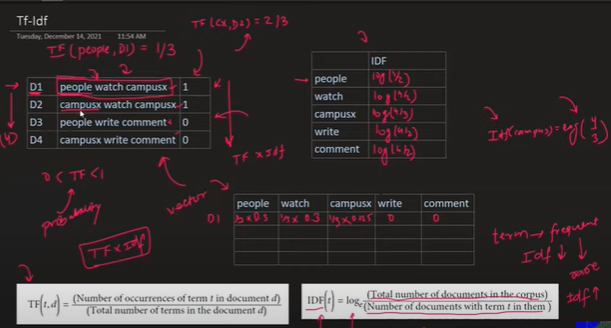



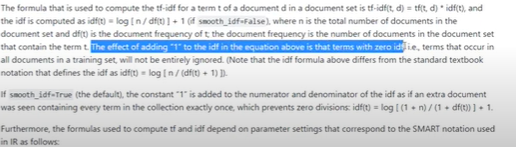

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [ ]:
tfidf.fit_transform(df["text"]).toarray()

array([[0.        , 0.        , 0.37919167, 0.        , 0.72664149,
        0.        , 0.5728925 , 0.        , 0.        ],
       [0.        , 0.        , 0.37919167, 0.        , 0.        ,
        0.72664149, 0.5728925 , 0.        , 0.        ],
       [0.58783765, 0.        , 0.30675807, 0.58783765, 0.        ,
        0.        , 0.        , 0.46345796, 0.        ],
       [0.        , 0.58783765, 0.30675807, 0.        , 0.        ,
        0.        , 0.        , 0.46345796, 0.58783765]])

In [ ]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.91629073 1.91629073 1.         1.91629073 1.91629073 1.91629073
 1.51082562 1.51082562 1.91629073]
['am' 'are' 'movies' 'not' 'people' 'they' 'watch' 'watching' 'you']


<H1><b>WORD2VEC


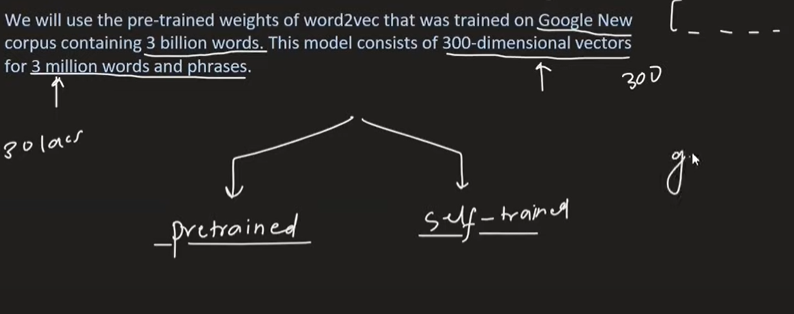


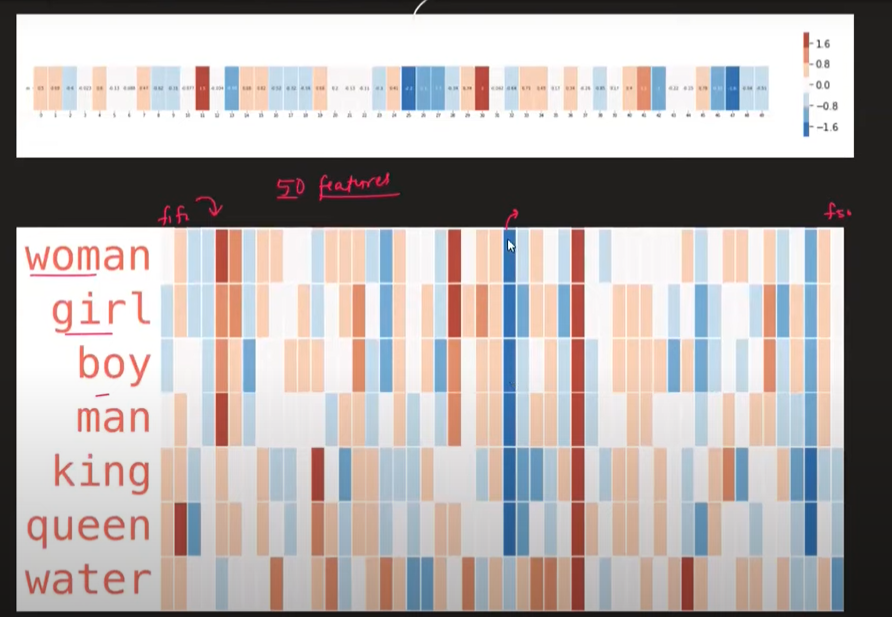

In [ ]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e5edf6e4c87ff046433e7260f7303317067df912249ccaf0b5d599d71e5fdbea
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# !wget -c "https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300"

In [ ]:
# model = KeyedVectors.load_word2vec_format('/content/googlenewsvectorsnegative300',binary=True,limit=500000)

In [ ]:
import gensim.downloader as api

wv_model = api.load('word2vec-google-news-300')


In [ ]:
wv_model['king'].shape
# wv_model["football"]

NameError: ignored

In [ ]:
wv_model.most_similar("boy")

In [ ]:
 wv_model.similarity("man" , "food")

In [ ]:
wv_model.similarity("man" , "women")
wv_model.similarity("man" , "boy")

In [ ]:
wv_model.doesnt_match(["man","php" , "kay"])

<h1><b> CBOW

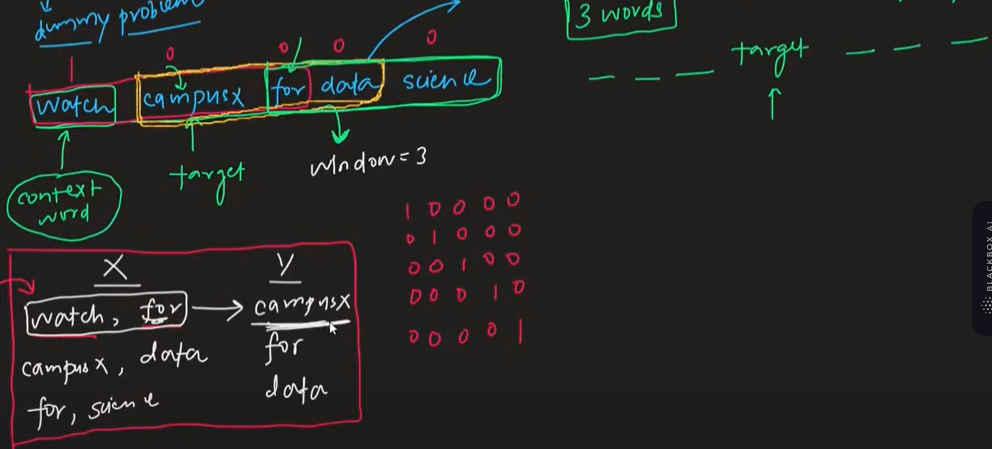

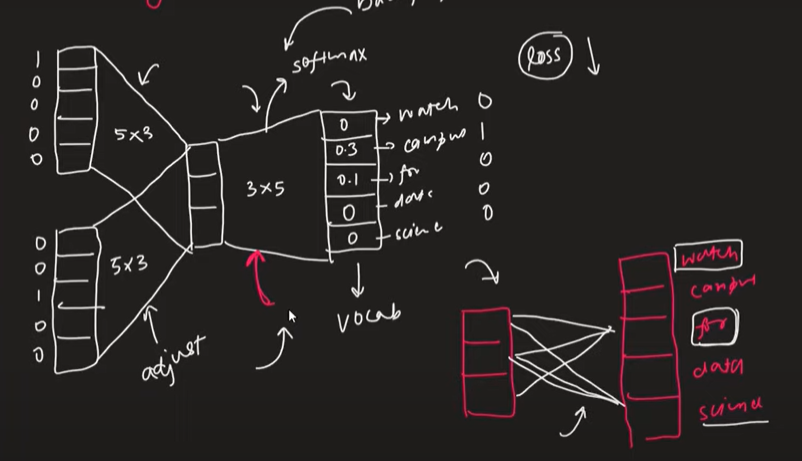

In [ ]:
# Assuming you uploaded files named "file1.txt", "file2.txt", and "file3.txt"

# Read the content of the first text file
with open("/content/001ssb.txt", "r") as file:
    content1 = file.read()

# Read the content of the second text file
with open("/content/002ssb.txt", "r") as file:
    content2 = file.read()

# Read the content of the third text file
with open("/content/003ssb.txt", "r") as file:
    content3 = file.read()

# You can now work with the content of these files in your Colab notebook


In [ ]:
!pip install gensim

In [ ]:
combined_content = content1 + content2 + content3
wor=combined_content.split()
len(wor)


1050297

In [ ]:
# combined_content

In [ ]:
from nltk.tokenize import sent_tokenize , word_tokenize
from gensim.utils import simple_preprocess
sent=sent_tokenize(combined_content)
story=[]
for s in sent:
  story.append(simple_preprocess(s))

simple preprocesss tokenize each sent in token words above

In [ ]:
story[0]

['game',
 'of',
 'thrones',
 'book',
 'one',
 'of',
 'song',
 'of',
 'ice',
 'and',
 'fire',
 'by',
 'george',
 'martin',
 'prologue',
 'we',
 'should',
 'start',
 'back',
 'gared',
 'urged',
 'as',
 'the',
 'woods',
 'began',
 'to',
 'grow',
 'dark',
 'around',
 'them']

Model perameter setting

In [ ]:
import gensim
model=gensim.models.Word2Vec(
    window=10,
    min_count=2,

)

built vocabulary

In [ ]:
model.build_vocab(story)

training out model

In [ ]:
model.train(story , total_examples=model.corpus_count , epochs=5)


(3824792, 5045030)

In [ ]:
model.wv.most_similar("unburnt")

[('stormborn', 0.946759045124054),
 ('daenerys', 0.8422027230262756),
 ('surviving', 0.8352869749069214),
 ('mellario', 0.8221548795700073),
 ('trueborn', 0.8206480741500854),
 ('wealthy', 0.816054105758667),
 ('deepwood', 0.8125540018081665),
 ('ward', 0.8084705471992493),
 ('sole', 0.8052664399147034),
 ('dorne', 0.8021992444992065)]

In [ ]:
model.wv.doesnt_match(["robb" , "arya" , "jon " , "bran"])

'robb'

In [ ]:
print(model.wv["robb"],"\n")
len(model.wv["robb"])

[-0.409945    0.33380187 -0.38494503  0.7615468   0.5301634  -0.56982714
  1.3982153   0.5146888  -0.8880065   0.37187135 -0.02919474  0.18703556
 -0.42587662  0.32677492  0.3238352   0.61433125  0.4432398   0.00809153
 -1.0112655  -0.6253784   0.26718062  0.51015764 -1.2813773   0.77355874
  0.09290861 -0.6702296   1.1562314   1.5044285  -1.1853896   1.5911404
  0.31708273  0.7746726   1.0207692  -1.134118    0.77120095 -0.7422438
  0.8658004   0.20664963 -0.13100827 -0.50981945 -0.7178471  -0.9680019
 -0.7325364   0.8020428   0.01935787 -0.30259225  0.72801286  0.11312053
  1.581488    0.5333871   0.4353845   0.38199824  0.0351613   0.25532982
  0.28161547  0.43868187 -0.00251254  0.26779184  0.7421528   0.28684205
  1.0910933   0.71802515  0.07867298  0.08203775 -0.79935104  1.0056218
  1.2588342   0.91210884 -0.29620826  1.0921195  -1.1874443   0.33112833
  0.41908514 -0.960849    0.6706663   0.3010034   1.0244344   0.323094
  0.35756084 -0.5118632  -0.2545591   1.4934928  -0.35039

100

In [ ]:
print("i have total number of unique words in this data (words , dimension) = ",model.wv.get_normed_vectors().shape)

i have total number of unique words in this data (words , dimension) =  (13774, 100)


In [ ]:
y=model.wv.index_to_key
len(y)
y[0]

'the'

now we will plot words in space but we have 100 dimensio so we can use PCA  to reduce this dimwntio as we want

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=3) #in how much dimension u want to reduce ur data i want 3d data

In [ ]:
x=pca.fit_transform(model.wv.get_normed_vectors())

In [ ]:
x.shape
#look at the ouput we have now 3 dimension


(13774, 3)

In [ ]:
import plotly.express as px
fig=px.scatter_3d(x[200:400], x=0 ,y=1 ,z=2 , color=y[200:400]) #here i just want to to show 100 words we can change it on ur choice
fig.show()

<h1><b>extra work

In [ ]:
import nltk

import nltk
nltk.download('punkt')

import nltk
nltk.download('averaged_perceptron_tagger')
text="i am faisal and i am from peshawar , i like to ride in metro to vidit to my college "

tokenized_text=nltk.word_tokenize(text)
tagged_text=nltk.pos_tag(tokenized_text)
tagged_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('i', 'NN'),
 ('am', 'VBP'),
 ('faisal', 'NN'),
 ('and', 'CC'),
 ('i', 'NN'),
 ('am', 'VBP'),
 ('from', 'IN'),
 ('peshawar', 'NN'),
 (',', ','),
 ('i', 'VBP'),
 ('like', 'IN'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('in', 'IN'),
 ('metro', 'NN'),
 ('to', 'TO'),
 ('vidit', 'NN'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('college', 'NN')]

In [ ]:

import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
print(nltk.ne_chunk(tagged_text))

(S
  i/NN
  am/VBP
  faisal/NN
  and/CC
  i/NN
  am/VBP
  from/IN
  peshawar/NN
  ,/,
  i/VBP
  like/IN
  to/TO
  ride/VB
  in/IN
  metro/NN
  to/TO
  vidit/NN
  to/TO
  my/PRP$
  college/NN)


<h1> <b> ENTITY RECOGNITION using spacy

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
# nlp.entity

In [ ]:
text=nlp("""London, the capital of England and the United Kingdom, is a 21st-century city with history stretching back to Roman times.
 At its centre stand the imposing Houses of Parliament, the iconic ‘Big Ben’ clock tower and Westminster Abbey, site
 of British monarch coronations. Across the Thames River, the London Eye observation wheel provides panoramic views of
 the South Bank cultural complex, and the entire city """)

text.ents
type(text)

In [ ]:
text.ents[3] , text.ents[3].label_

<h1>polyglot  

In [ ]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor

In [ ]:
# -*- coding: utf8 -*-
import polyglot
from polyglot.text import Text, Word
from polyglot.downloader import downloader
downloader.download("embeddings2.en")
downloader.download("ner2.en")

In [ ]:
from polyglot.text import Text
text=("""London, the capital of England and the United Kingdom, is a 21st-century city with history stretching back to Roman times.
 At its centre stand the imposing Houses of Parliament, the iconic ‘Big Ben’ clock tower and Westminster Abbey, site
 of British monarch coronations. Across the Thames River, the London Eye observation wheel provides panoramic views of
 the South Bank cultural complex, and the entire city """)
ptext=Text(text)
# print(type(text))
ptext.entities

<h1><b>handling Shorthand text in sms mean chat words

In [ ]:
dict_shortlist.keys()

In [ ]:
def chat_con(text):
  new_text=[]
  for w in text.split():
    if w.upper() in dict_shortlist:
      new_text.append(dict_shortlist[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [ ]:
chat_con("atk")
chat_con("gn")

remove Punctuation

In [ ]:
import string , time
punc=string.punctuation
punc

In [ ]:
def remove_punc(text):
  p=re.compile(r"")